In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
import emoji
import pandas as pd
import numpy as np

In [3]:
emoji.EMOJI_UNICODE

{'en': {':1st_place_medal:': '🥇',
  ':2nd_place_medal:': '🥈',
  ':3rd_place_medal:': '🥉',
  ':AB_button_(blood_type):': '🆎',
  ':ATM_sign:': '🏧',
  ':A_button_(blood_type):': '🅰',
  ':Afghanistan:': '🇦🇫',
  ':Albania:': '🇦🇱',
  ':Algeria:': '🇩🇿',
  ':American_Samoa:': '🇦🇸',
  ':Andorra:': '🇦🇩',
  ':Angola:': '🇦🇴',
  ':Anguilla:': '🇦🇮',
  ':Antarctica:': '🇦🇶',
  ':Antigua_&_Barbuda:': '🇦🇬',
  ':Aquarius:': '♒',
  ':Argentina:': '🇦🇷',
  ':Aries:': '♈',
  ':Armenia:': '🇦🇲',
  ':Aruba:': '🇦🇼',
  ':Ascension_Island:': '🇦🇨',
  ':Australia:': '🇦🇺',
  ':Austria:': '🇦🇹',
  ':Azerbaijan:': '🇦🇿',
  ':BACK_arrow:': '🔙',
  ':B_button_(blood_type):': '🅱',
  ':Bahamas:': '🇧🇸',
  ':Bahrain:': '🇧🇭',
  ':Bangladesh:': '🇧🇩',
  ':Barbados:': '🇧🇧',
  ':Belarus:': '🇧🇾',
  ':Belgium:': '🇧🇪',
  ':Belize:': '🇧🇿',
  ':Benin:': '🇧🇯',
  ':Bermuda:': '🇧🇲',
  ':Bhutan:': '🇧🇹',
  ':Bolivia:': '🇧🇴',
  ':Bosnia_&_Herzegovina:': '🇧🇦',
  ':Botswana:': '🇧🇼',
  ':Bouvet_Island:': '🇧🇻',
  ':Brazil:': '🇧🇷',
  ':British_Indi

In [4]:
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
emoji_dict = {      "0": "\u2764\uFE0F",    
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:",
                   }

In [10]:
for e in emoji_dict.values():
    print(emoji.emojize(e))

❤️
⚾
😁
😓
🍴


In [11]:
df1=pd.read_csv('train_emoji.csv')

In [12]:
df1.head(132)

,Text,Labels,Unnamed: 2,Unnamed: 3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN
...,...,...,...,...
127,he had to make a home run,1,NaN,NaN
128,I am ordering food,4,NaN,NaN
129,What is wrong with you,3,NaN,NaN
130,I love you,0,NaN,NaN


In [13]:
df1.shape

(132, 4)

In [14]:
df1['Labels'].value_counts()

2    38
3    36
0    22
1    19
4    17
Name: Labels, dtype: int64

In [15]:
df2=pd.read_csv('emojify_data.csv')

In [16]:
df2.head(132)

,Text,Labels,Unnamed: 2,Unnamed: 3
0,French macaroon is so tasty,4,NaN,NaN
1,work is horrible,3,NaN,NaN
2,I am upset,3,NaN,[3]
3,throw the ball,1,NaN,[2]
4,Good joke,2,NaN,NaN
...,...,...,...,...
127,lol,2,NaN,NaN
128,I got humiliated by my sister,3,NaN,NaN
129,I want to eat,4,NaN,NaN
130,the lectures are great though,2,NaN,NaN


In [17]:
df2.shape

(183, 4)

In [18]:
train_df=pd.concat([df1,df2],ignore_index=True)

In [19]:
train_df

,Text,Labels,Unnamed: 2,Unnamed: 3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN
...,...,...,...,...
310,lets brunch some day,4,NaN,NaN
311,dance with me,2,NaN,NaN
312,she is a bully,3,NaN,NaN
313,she plays baseball,1,NaN,NaN


In [20]:
test_df=pd.read_csv('test_emoji.csv')

In [21]:
test_df.head(56)

,Text,Labels
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a very nice raise\t,2
3,she got me a nice present\t,2
4,ha ha ha it was so funny\t,2
5,he is a good friend\t,2
6,I am upset\t,3
7,We had such a lovely dinner tonight\t,2
8,where is the food\t,4
9,Stop making this joke ha ha ha\t,2


In [22]:
x_train=train_df['Text']

In [23]:
x_test=test_df['Text']

In [24]:
y_train=train_df['Labels']

In [25]:
y_train.value_counts()

2    94
3    88
0    55
4    40
1    38
Name: Labels, dtype: int64

In [26]:
y_test=test_df['Labels']

In [27]:
y_test.value_counts()

2    18
3    16
1     8
4     7
0     7
Name: Labels, dtype: int64

In [28]:
y_train_categorical=ku.to_categorical(y_train,num_classes=5)

In [29]:
y_test_categorical=ku.to_categorical(y_test,num_classes=5)

In [30]:
tokenizer=Tokenizer()

In [31]:
tokenizer.fit_on_texts(x_train)

In [32]:
word_index=tokenizer.word_index
word_index

{'i': 1,
 'you': 2,
 'is': 3,
 'the': 4,
 'a': 5,
 'am': 6,
 'so': 7,
 'my': 8,
 'to': 9,
 'are': 10,
 'this': 11,
 'for': 12,
 'she': 13,
 'he': 14,
 'ha': 15,
 'me': 16,
 'not': 17,
 'love': 18,
 'your': 19,
 'it': 20,
 'want': 21,
 'have': 22,
 'did': 23,
 'got': 24,
 'do': 25,
 'food': 26,
 'like': 27,
 'was': 28,
 'baseball': 29,
 'of': 30,
 'life': 31,
 'miss': 32,
 'stop': 33,
 'will': 34,
 'job': 35,
 'funny': 36,
 'that': 37,
 'joke': 38,
 'at': 39,
 'good': 40,
 'bad': 41,
 'what': 42,
 'great': 43,
 'day': 44,
 'on': 45,
 'him': 46,
 'game': 47,
 'lets': 48,
 'cute': 49,
 'dinner': 50,
 'lot': 51,
 'down': 52,
 'with': 53,
 'ball': 54,
 'again': 55,
 'go': 56,
 'fun': 57,
 'lol': 58,
 'working': 59,
 'and': 60,
 'had': 61,
 'her': 62,
 'smile': 63,
 'proud': 64,
 'congratulations': 65,
 'too': 66,
 'long': 67,
 'no': 68,
 'shouting': 69,
 'likes': 70,
 'just': 71,
 'excited': 72,
 'said': 73,
 'yes': 74,
 'forever': 75,
 'we': 76,
 'dogs': 77,
 'two': 78,
 'by': 79,
 'who': 

In [33]:
vocab_size=len(word_index)+1
vocab_size

319

In [34]:
train_sequence=tokenizer.texts_to_sequences(x_train)
train_padded=pad_sequences(train_sequence,maxlen=10)

In [35]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded=pad_sequences(test_sequence,maxlen=10)

In [36]:
# This is the 100 dimension version of GloVe from Stanford
# I am using a api for faster access
'''!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt'''
embeddings_index = {};
with open('glove.6B.100d.txt',errors="ignore") as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='str');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size,100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [37]:
model1=Sequential()

In [38]:
model1.add(Embedding(vocab_size,100,input_length=10,weights=[embeddings_matrix],trainable=False))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(32)))
model1.add(Dense(5,activation='softmax'))

In [39]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           31900     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                34048     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 66,273
Trainable params: 34,373
Non-trainable params: 31,900
_________________________________________________________________


In [40]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history=model1.fit(train_padded,y_train_categorical,epochs=30,validation_data=(test_padded,y_test_categorical))

Epoch 1/30
10/10 [==============================] - 13s 502ms/step - loss: 1.5528 - accuracy: 0.3172 - val_loss: 1.5052 - val_accuracy: 0.3750
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 1.4691 - accuracy: 0.3810 - val_loss: 1.4399 - val_accuracy: 0.3929
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 1.4142 - accuracy: 0.4107 - val_loss: 1.3730 - val_accuracy: 0.4464
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 1.3162 - accuracy: 0.5108 - val_loss: 1.2825 - val_accuracy: 0.4821
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 1.2304 - accuracy: 0.5962 - val_loss: 1.1815 - val_accuracy: 0.5536
Epoch 6/30
10/10 [==============================] - 0s 9ms/step - loss: 1.0926 - accuracy: 0.6692 - val_loss: 1.0629 - val_accuracy: 0.6250
Epoch 7/30
10/10 [==============================] - 0s 9ms/step - loss: 1.0066 - accuracy: 0.6901 - val_loss: 0.9577 - val_accuracy: 0.6429
Epoch 8/30
10/10 

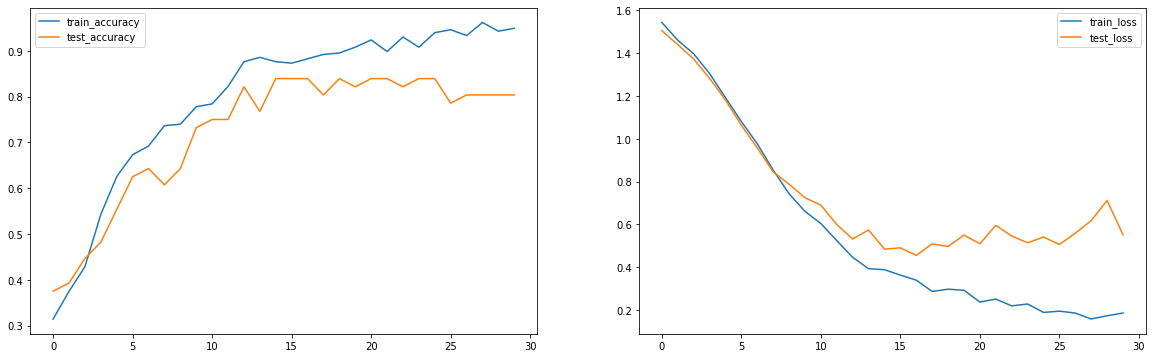

In [42]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

In [43]:
model2=Sequential()

In [44]:
model2.add(Embedding(vocab_size,100,input_length=10,weights=[embeddings_matrix],trainable=False))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(128,return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(128)))
model2.add(Dense(5,activation='softmax'))

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           31900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 256)           234496    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 661,921
Trainable params: 630,021
Non-trainable params: 31,900
___________________________________________

In [46]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
history=model2.fit(train_padded,y_train_categorical,epochs=30,validation_data=(test_padded,y_test_categorical))

Epoch 1/30
10/10 [==============================] - 0s 32ms/step - loss: 0.0243 - accuracy: 0.9968 - val_loss: 1.3066 - val_accuracy: 0.8214
Epoch 2/30
10/10 [==============================] - 0s 28ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 1.2388 - val_accuracy: 0.8393
Epoch 3/30
10/10 [==============================] - 0s 28ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 1.1765 - val_accuracy: 0.8393
Epoch 4/30
10/10 [==============================] - 0s 34ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.1737 - val_accuracy: 0.8393
Epoch 5/30
10/10 [==============================] - 0s 31ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.2944 - val_accuracy: 0.8214
Epoch 6/30
10/10 [==============================] - 0s 40ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.3451 - val_accuracy: 0.8214
Epoch 7/30
10/10 [==============================] - 0s 49ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 1.2024 - val_accuracy: 0.8393
Epoch 8/30
10

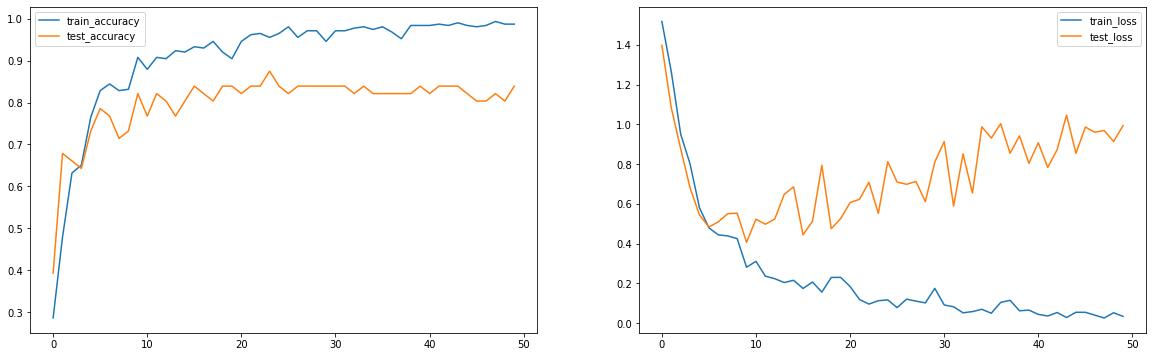

In [48]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

In [49]:
prediction=model2.predict_classes(test_padded)

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       1.00      1.00      1.00         8
           2       0.86      0.67      0.75        18
           3       0.94      0.94      0.94        16
           4       1.00      0.86      0.92         7

    accuracy                           0.84        56
   macro avg       0.86      0.86      0.85        56
weighted avg       0.87      0.84      0.85        56



In [51]:
confusion_matrix(y_test,prediction)

array([[ 6,  0,  1,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 6,  0, 12,  0,  0],
       [ 0,  0,  1, 15,  0],
       [ 0,  0,  0,  1,  6]], dtype=int64)

In [52]:
emoji_dict={0:['heart',':heart:'],1:['baseball',':baseball:'],2:['smile',':smile:'],3:['disappoined',':disappointed:'],4:['fork and knife',':fork_and_knife:']}

In [53]:
text=x_test[8]
text

'where is the food\t'

In [54]:
y_test[8]

4

In [55]:
def predict(text):
  text_sequence=tokenizer.texts_to_sequences([text])
  text_padded=pad_sequences(text_sequence,maxlen=30)
  prediction=model2.predict_classes(text_padded)
  x=prediction[0]
  print(emoji_dict[x][0])
  print(emoji.emojize(emoji_dict[x][1], use_aliases=True))

In [56]:
ans=predict(text)
ans

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


fork and knife
🍴


In [57]:
msg='you brighten my day'
ans=predict(msg)
ans

smile
😄


In [58]:
msg='she got me a nice present'
ans=predict(msg)
ans

heart
❤


In [59]:
msg='This girl is messing with me'
ans=predict(msg)
ans

disappoined
😞


In [60]:
msg='will you be my valentine'
ans=predict(msg)
ans

heart
❤


In [61]:
msg='Honey lets go out for a date'
ans=predict(msg)
ans

heart
❤


In [62]:
msg='I am happy'
ans=predict(msg)
ans

smile
😄
